In [100]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
file = "dataset_preprocessedv3.csv"
df = pandas.read_csv(file)

In [117]:
x = df.iloc[:, 3:20]
y = df[['2kRank']]
x = x.to_numpy()
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
y = np.ravel(y.to_numpy())
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2,random_state=1)

# Linear Regression

Training Error 28.199230293867387
Test Error 34.58640405585485


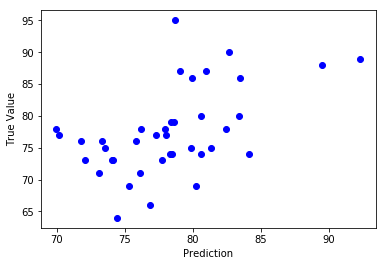

In [33]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')
plt.xlabel('Prediction')
plt.ylabel('True Value')
print("Test Error", mean_squared_error(y_test,y_pred_test))

# Polynomial Regression

c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\akash\appdata\local\programs\python\python37-32\lib\site-p

Best Param: 0.91
Training Error: 34.119593588981594
Test Error: 32.184957090701445


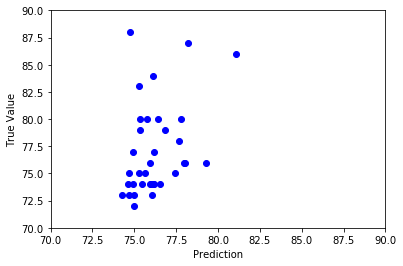

In [129]:
minva = 500
for i in range(1,101,1):
    est = make_pipeline(PolynomialFeatures(2), Lasso(i/100))
    est.fit(x_train, y_train)
    va = mean_squared_error(y_val, est.predict(x_val))
    if va < minva:
        y_pred_train_best = est.predict(x_train)
        y_pred_test_best = est.predict(x_test)
        bestparam = i/100
        minva = va
        minte = mean_squared_error(y_test, est.predict(x_test))
        mintr = mean_squared_error(y_train, est.predict(x_train))
print("Best Param:", bestparam)
print("Training Error:", mintr)
scat = plt.scatter(y_pred_test_best,y_test, color = 'blue')
plt.axis((70,90,70,90))
plt.xlabel('Prediction')
plt.ylabel('True Value')
print("Test Error:", minte)

Best Param: 500.01
Training Error: 29.73317346841174
Test Error: 32.2568555801009


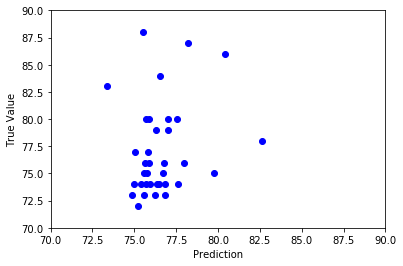

In [130]:
minva = 500
for i in range(1,50005,5):
    est = make_pipeline(PolynomialFeatures(2), Ridge(i/100))
    est.fit(x_train, y_train)
    va = mean_squared_error(y_val, est.predict(x_val))
    if va < minva:
        y_pred_train_best = est.predict(x_train)
        y_pred_test_best = est.predict(x_test)
        bestparam = i/100
        minva = va
        minte = mean_squared_error(y_test, est.predict(x_test))
        mintr = mean_squared_error(y_train, est.predict(x_train))
print("Best Param:", bestparam)
print("Training Error:", mintr)
scat = plt.scatter(y_pred_test_best,y_test, color = 'blue')
plt.axis((70,90,70,90))
plt.xlabel('Prediction')
plt.ylabel('True Value')
print("Test Error:", minte)

In [89]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly, y_train)
lr2 = LinearRegression()
lr2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
y_pred_test = lr2.predict(poly_reg.fit_transform(x_test))
y_pred_train = lr2.predict(poly_reg.fit_transform(x_train))
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')

plt.xlabel('Prediction')
plt.ylabel('True Value')
print("Test Error", mean_squared_error(y_test,y_pred_test))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# SVR

Training Error 32.611729946863576
Test Error 36.643202451779516


c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


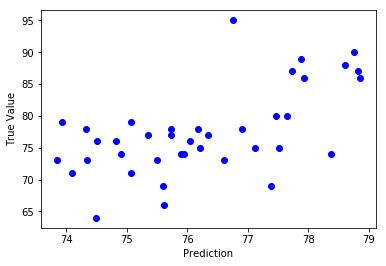

In [36]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')
plt.xlabel('Prediction')
plt.ylabel('True Value')
print("Test Error", mean_squared_error(y_test,y_pred_test))

# Ridge Regression

In [47]:
kf = KFold(n_splits=5,random_state=3,shuffle=True)
kf.get_n_splits(x)
bestalph = -1
for i in range(0,50005,5):
    minte = 100
    te = 0
    tr = 0
    for train_index, test_index in kf.split(x):
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]


        rr = Ridge(alpha=i/100)
        rr.fit(x_train, y_train)
        y_pred_test = rr.predict(x_test)
        y_pred_train = rr.predict(x_train)
        #print(i/100)
        #print("Training Error",mean_squared_error(y_train,y_pred_train))
        #plt.scatter(y_pred_test,y_test, color = 'blue')
        #plt.xlabel('Prediction')
        #plt.ylabel('True Value')
        #print("Test Error", mean_squared_error(y_test,y_pred_test))
        tr += mean_squared_error(y_train,y_pred_train)
        te += mean_squared_error(y_test,y_pred_test)
    tr = tr/5
    te = te/5
    if te < minte:
        mintr = tr
        minte = te
        #print(bestalph)
        bestalph = i/100
print(tr,minte,bestalph)
print(y_pred_test)

34.73810789442962 37.02446474926872 500.0
[74.33033782 78.80460704 75.69388131 76.88150301 77.7178359  78.57175118
 76.79744848 76.20405094 76.31921454 75.84195755 76.3006067  76.53119965
 76.72229831 76.1050042  77.67210857 80.92554085 77.21482856 76.25507701
 75.86686427 76.37439735 81.14677596 76.4537446  78.59384967 74.57841096
 75.42488667 76.80248484 75.86563581 74.91550235 76.95278228 77.53329317
 74.5523676  74.41918653 77.2662353  75.11417429 76.91044624 76.54342891
 77.69852645 76.97928841 76.99094648]


In [82]:
bestalph = -1
minva = 100
for i in range(0,50005,5):
    te = 0
    tr = 0
    rr = Ridge(alpha=i/100)
    rr.fit(x_train, y_train)
    y_pred_test = rr.predict(x_test)
    y_pred_train = rr.predict(x_train)
    y_pred_val = rr.predict(x_val)
    #print(i/100)
    #print("Training Error",mean_squared_error(y_train,y_pred_train))
    #plt.scatter(y_pred_test,y_test, color = 'blue')
    #plt.xlabel('Prediction')
    #plt.ylabel('True Value')
    #print("Test Error", mean_squared_error(y_test,y_pred_test))
    tr = mean_squared_error(y_train,y_pred_train)
    te = mean_squared_error(y_test,y_pred_test)
    va = mean_squared_error(y_val,y_pred_val)
    if va < minva:
        y_pred_test_best = y_pred_test
        y_pred_train_best = y_pred_train
        minva = va
        mintr = tr
        minte = te
        bestalph = i/100

Best Lambda for Ridge Regression: 29.25
Training Error 32.03015666884525
Test Error 32.092214578006505


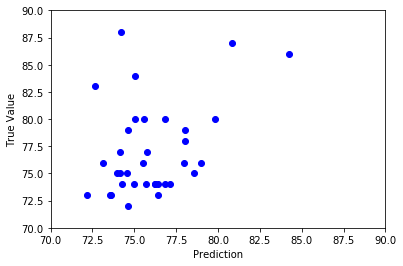

In [84]:
print("Best Lambda for Ridge Regression:",bestalph)
print("Training Error",mean_squared_error(y_train,y_pred_train_best))
scat = plt.scatter(y_pred_test_best,y_test, color = 'blue')
plt.axis((70,90,70,90))
plt.xlabel('Prediction')
plt.ylabel('True Value')
print("Test Error", mean_squared_error(y_test,y_pred_test_best))

# Lasso Regression

In [41]:
kf = KFold(n_splits=3,random_state=3,shuffle=True)
kf.get_n_splits(x)
bestalph = -1
for i in range(0,10005,5):
    minte = 100
    te = 0
    tr = 0
    for train_index, test_index in kf.split(x):
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]


        lasso = Lasso(alpha=i/100)
        lasso.fit(x_train, y_train)
        y_pred_test = lasso.predict(x_test)
        y_pred_train = lasso.predict(x_train)
        #print(i/100)
        #print("Training Error",mean_squared_error(y_train,y_pred_train))
        #plt.scatter(y_pred_test,y_test, color = 'blue')
        #plt.xlabel('Prediction')
        #plt.ylabel('True Value')
        #print("Test Error", mean_squared_error(y_test,y_pred_test))
        tr += mean_squared_error(y_train,y_pred_train)
        te += mean_squared_error(y_test,y_pred_test)
    tr = tr/3
    te = te/3
    if te < minte:
        mintr = tr
        minte = te
        #print(bestalph)
        bestalph = i/100
print(tr,minte,bestalph)
print(y_pred_test)

c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to 

41.11096646942801 43.57116370808679 100.0
[77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769
 77.59230769 77.59230769 77.59230769 77.59230769 77.59230769]
